# Lab 5: Hermite Polynomials Using Divided Differences/Hermite Interpolation

###  Given the data

| x  | f(x)   | f'(x)  |
|----|--------|--------|
| -1 | -0.7294| 1.5497 |
| 0  | 0.3069 | -0.5000|
| 1  | -1.7294| -2.5497|
| 2  | -2.7806| 0.6328 |


### (a)
- Use your Python function `newtonDivDiff` to find the coefficients of the Lagrange interpolating polynomial. Write down the Lagrange interpolating polynomial.

### (b)
- Use your Python function `hermiteDivDiff` to find the coefficients of the Hermite polynomial. Write down the Hermite interpolating polynomial.

### (c)
- import `numpy` as `np`. ON the same figure, in the interval [-1.5, 2.5] usign `xp = np.linspace(-1.5, 2.5, 201)`.
    - plot the function $f(x) = \cos(2x) - \ln(e^x +1)$ (the function that was used to produce the data) with blue solid line
    - plot the Lagrange interpolating polynomial you found in (a) with green line, and
    - plot the Hermite polynomial you found in (b) with red line
    
Add a legend to indicate whic hcurve represents the graph of which function.

### (d)
Plot the absolute differences between the true solution and the two approximating polynomials found in (a) and (b). Add a legend to indicate which curve represents the graph of which difference.

Which polynomial gives a better approximation of the function
f(x) in [−1, 2]? For the extrapolations in [-1.5, -1] and (2, 2.5], how well do the two polynomials approximate the function?

In [46]:
import sys
import os

sys.path.append(r"C:\\Users\\ntlmp\\MATH323-NumericalAnalysis")

In [47]:
# part a
x = [-1, 0, 1, 2]
f = [-0.7294, 0.3069, -1.7294, -2.7806]
fd = [1.5497, -0.5000, -2.5497, 0.6328]

from NumericalMethodsCode.newtonDivDiff import newtonDivDiff

FDCoef1, BDCoef1 = newtonDivDiff(x, f)

print(f"FDCoeff: {FDCoef1}")
print(f"x: {x}")

FDCoeff: [-0.7294      1.0363     -1.5363      0.67628333]
x: [-1, 0, 1, 2]


The Lagrange interpolating polynomial is written as: $P_5(x) = -0.7294 + 1.0363(x+1) - 1.5363(x+1)x + 0.67628333(x+1)(x)(x-1)$

In [48]:
# part b
from NumericalMethodsCode.hermiteDivDiff import hermiteDivDiff
FDCoef2 = hermiteDivDiff(x, f, fd)

print(f"FDCoeff: {FDCoef2}")
print(f"x: {x}")

FDCoeff: [-7.29400000e-01  1.54970000e+00 -5.13400000e-01 -1.02290000e+00
  5.11450000e-01  1.11022302e-16 -5.77694444e-02  1.61935185e-02]
x: [-1, 0, 1, 2]


The Hermite interpolating polynomial is written as: $H_9(x) = -0.7294 + 1.5497(x+1) - 0.5134(x+1)^2 - 1.0229(x+1)^2 x - 0.51145(x+1)^2 x^2 + 1e^{-16} (x+1)^2(x^2)(x-1) - 0.0577(x+1)^2 x^2 (x-1)^2 + 0.016194(x+1)^2 x^2 (x-1)^2 (x-2)$.

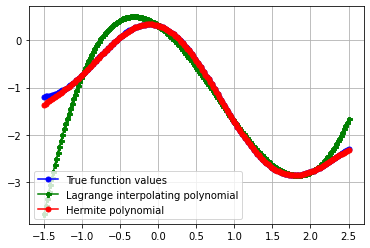

In [49]:
# part c

import matplotlib.pyplot as plt
import numpy as np

# Define the true function
f = lambda x: np.cos(2*x) - np.log(np.exp(x) + 1)

# Define the range for x values
xp = np.linspace(-1.5, 2.5, 201)

# Define the Lagrange interpolating polynomial
lagrange_interpolating_polynomial = lambda x: (-0.7294 + 1.0363*(x+1) 
                                               - 1.5363*(x+1)*x 
                                               + 0.67628*(x+1)*x*(x-1))

# Define the Hermite interpolating polynomial
H_9 = lambda x: (-0.7294 
                 + 1.5497 * (x + 1) 
                 - 0.5134 * (x + 1)**2 
                 - 1.0229 * (x + 1)**2 * x 
                 + 0.51145 * (x + 1)**2 * x**2 
                 + 1.1102e-16 * (x + 1)**2 * x**2 * (x - 1) 
                 - 0.05777 * (x + 1)**2 * x**2 * (x - 1)**2 
                 + 0.01619 * (x + 1)**2 * x**2 * (x - 1)**2 * (x - 2))

# Plot the true function values
plt.plot(xp, f(xp), marker='o', markersize=5, color="blue", label="True function values")

# Plot the Lagrange interpolating polynomial approximation
plt.plot(xp, lagrange_interpolating_polynomial(xp), marker='P', markersize=5, color="green", label="Lagrange interpolating polynomial")

# Plot the Hermite polynomial approximation
plt.plot(xp, H_9(xp), marker='o', markersize=5, color="red", label="Hermite polynomial")

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Display the plot
plt.show()



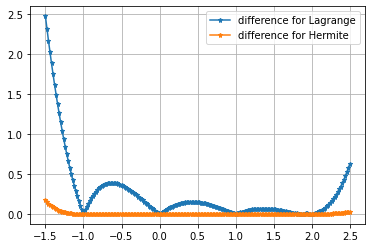

In [37]:
# part d

plt.plot(xp, abs(f(xp) -lagrange_interpolating_polynomial(xp)), marker='*', markersize=5) # true values - lagrange
plt.plot(xp, abs(f(xp) - H_9(xp)), marker='*', markersize=5) # true values - taylor
plt.legend(["difference for Lagrange", "difference for Hermite"])
plt.grid()
plt.show()

Hermite approximates better in the interval of [-1, 2]. Outside of [-1, 2], both approximations are less accurate, but Hermite works bettter.

### Consider $f(x) = \frac{1}{1+25x^2}$

### (a)
- Do import `numpy as np`. Use `xx = np.linspace(-1,1,9)` to divide [−1, 1] into 8 equal size subintervals. Let `ff = f(xx)`, find the approximated function values for `xp = np.linspace(-1,1,101)` using your functions `lagrangeInterpFD` and `hermiteInterp`. Then plot in the same figure
    - the true function values (xp, f(xp)),
    - the approximate function values from the Lagrange interpolating polynomial (xp,FDapprox),
and
    - the approximate function values from the Hermite interpolating polynomial (xp,Happrox)

Plot the data points with marker ‘s’ and markersize = 6 and use different color or line styles for each set of function values. Add a legend to indicate which line represents the graph of which function.

Is the Runge’s phenomenon present for both the Lagrange and Hermite approximations?

### (b)
- Try with 16 subintervals in [-1, 1] (`xx = np.linspace(-1,1,17)`) and plot the true and approximated functions values as in the (a) part. Which approximation has larger oscillation?

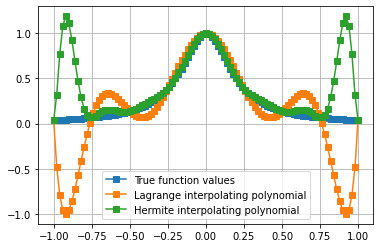

In [39]:
f = lambda x: 1 / (1 + 25*x**2)
fd = lambda x: -50*x / (25*x**2 +1)**2
xx = np.linspace(-1,1,9) # divide [-1,1] into 8 equal size subintervals
ff = f(xx)
ffd = fd(xx)
xp = np.linspace(-1, 1, 101)

from lagrangeInterpFD import lagrangeInterpFD
from hermiteInterp import hermiteInterp
FDapprox = lagrangeInterpFD(xx, ff, xp)
Happrox = hermiteInterp(xx, ff, ffd, xp)

plt.plot(xp, f(xp), marker='s', markersize=6) # true values
plt.plot(xp, FDapprox, marker='s', markersize=6) # Lagrange approx
plt.plot(xp, Happrox, marker='s', markersize=6) # Hermite approx
plt.legend(["True function values", "Lagrange interpolating polynomial", "Hermite interpolating polynomial"])
plt.grid()
plt.show()

The Runge phenomenon still exist with Hermite interpolation.

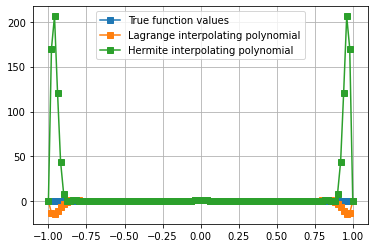

In [45]:
xx = np.linspace(-1,1,17) # 16 subintervals
ff = f(xx)
ffd = fd(xx)
xp = np.linspace(-1, 1, 101)

FDapprox = lagrangeInterpFD(xx, ff, xp)
Happrox = hermiteInterp(xx, ff, ffd, xp)

plt.plot(xp, f(xp), marker='s', markersize=6) # true values
plt.plot(xp, FDapprox, marker='s', markersize=6) # Lagrange approx
plt.plot(xp, Happrox, marker='s', markersize=6) # Hermite approx
plt.legend(["True function values", "Lagrange interpolating polynomial", "Hermite interpolating polynomial"])
plt.grid()
plt.show()

Hermite approximation has larger oscillations.